# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

or else , you can use below code

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

## Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
import pickle
from tqdm import tqdm
import nltk
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from collections import Counter
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud, STOPWORDS
import math

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

## Importing Data

In [2]:
data = pd.read_csv('preprocessed_data.csv')

In [3]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   

   teacher_number_of_previously_posted_projects clean_categories  \
0                                            53     math_science   

                  clean_subcategories  \
0  appliedsciences health_lifescience   

                                               essay   price  
0  i fortunate enough use fairy tale stem kits cl...  725.05

## Splitting Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

## Applying BoW on Essay feature

In [5]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)
    
vectorizer_bow = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer_bow.fit(X_train['essay'].values)

X_train_essay_bow = vectorizer_bow.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer_bow.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer_bow.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


##  Applying TFIDF on Essay Feature

In [6]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)
    
vectorizer_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer_tfidf.fit(X_train['essay'].values)

X_train_essay_tfidf = vectorizer_tfidf.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer_tfidf.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer_tfidf.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


## TFIDF W2V on Essay Feature

In [7]:
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [8]:
def get_tfidfw2v(tfidf_model, preprocessed_essays):
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    print(len(tfidf_w2v_vectors))
    print(len(tfidf_w2v_vectors[0]))
    return np.array(tfidf_w2v_vectors)

In [9]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)
    
vectorizer_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer_tfidf.fit(X_train['essay'].values)

X_train_essay_tfidf_w2v = get_tfidfw2v(vectorizer_tfidf, X_train['essay'].values)
X_cv_essay_tfidf_w2v = get_tfidfw2v(vectorizer_tfidf, X_cv['essay'].values)
X_test_essay_tfidf_w2v = get_tfidfw2v(vectorizer_tfidf, X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf_w2v.shape, y_train.shape)
print(X_cv_essay_tfidf_w2v.shape, y_cv.shape)
print(X_test_essay_tfidf_w2v.shape, y_test.shape)
print("="*100)

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)


  1%|          | 146/24155 [00:00<00:32, 729.84it/s]

49041
300


  0%|          | 163/36052 [00:00<00:44, 801.31it/s]

24155
300


100%|██████████| 36052/36052 [00:48<00:00, 747.42it/s]

36052
300
After vectorizations
(49041, 300) (49041,)
(24155, 300) (24155,)
(36052, 300) (36052,)


## One Hot Encoding the State Feature

In [10]:
vectorizer_state = CountVectorizer()
vectorizer_state.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer_state.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer_state.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer_state.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_state.get_feature_names())
print("="*100)   

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


## One Hot Encoding the Project Category Feature

In [11]:
vectorizer_grade = CountVectorizer()
vectorizer_grade.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_category_ohe = vectorizer_grade.transform(X_train['project_grade_category'].values)
X_cv_project_category_ohe = vectorizer_grade.transform(X_cv['project_grade_category'].values)
X_test_project_category_ohe = vectorizer_grade.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_project_category_ohe.shape, y_train.shape)
print(X_cv_project_category_ohe.shape, y_cv.shape)
print(X_test_project_category_ohe.shape, y_test.shape)
print(vectorizer_grade.get_feature_names())
print("="*100)  

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


## One Hot Encoding the Teacher Prefix Feature

In [12]:
vectorizer_teacher_prefix = CountVectorizer()
vectorizer_teacher_prefix.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix_ohe = vectorizer_teacher_prefix.transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix_ohe = vectorizer_teacher_prefix.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_ohe = vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_prefix_ohe.shape, y_train.shape)
print(X_cv_teacher_prefix_ohe.shape, y_cv.shape)
print(X_test_teacher_prefix_ohe.shape, y_test.shape)
print(vectorizer_teacher_prefix.get_feature_names())
print("="*100)   

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


## one Hot Encoding the Category Feature

In [13]:
vectorizer_cat = CountVectorizer()
vectorizer_cat.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories_ohe = vectorizer_cat.transform(X_train['clean_categories'].values)
X_cv_clean_categories_ohe = vectorizer_cat.transform(X_cv['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer_cat.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_cv_clean_categories_ohe.shape, y_cv.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print(vectorizer_cat.get_feature_names())
print("="*100)   

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


## One Hot Encoding the Sub Category Feature

In [14]:
vectorizer_subcat = CountVectorizer()
vectorizer_subcat.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories_ohe = vectorizer_subcat.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_ohe = vectorizer_subcat.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer_subcat.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print(vectorizer_subcat.get_feature_names())
print("="*100)  

After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


## Normalizing the Price Feature

In [15]:
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))
# normalizer.fit(X_train['price'])

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


## Normalizing the Previous Projects Feature

In [16]:
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_prev_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_prev_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_prev_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


print("After vectorizations")
print(X_train_prev_projects_norm.shape, y_train.shape)
print(X_cv_prev_projects_norm.shape, y_cv.shape)
print(X_test_prev_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


## Calculating the Sentiment Scores of Pre Processed Essays

In [17]:
def get_sentiment_scores(essays):
    sid = SentimentIntensityAnalyzer()
    
    scores = np.zeros(shape=(len(essays),4))

    for i in tqdm(range(len(essays))):
        essay = essays.iloc[i]
        ss = sid.polarity_scores(essay)
        sentscores = [ss['neg'], ss['neu'], ss['pos'], ss['compound']]
        scores[i] = sentscores

    print(scores.shape)  

    return scores

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

X_train_sent_scores = get_sentiment_scores(X_train['essay'])
X_cv_sent_scores = get_sentiment_scores(X_cv['essay'])
X_test_sent_scores = get_sentiment_scores(X_test['essay'])

print("Sentiment Scores Shapes")
print(X_train_sent_scores.shape)
print(X_cv_sent_scores.shape)
print(X_test_sent_scores.shape)
print("="*100)

  0%|          | 67/24155 [00:00<00:36, 667.43it/s]

(49041, 4)


  0%|          | 67/36052 [00:00<00:54, 662.99it/s]

(24155, 4)


100%|██████████| 36052/36052 [00:59<00:00, 610.62it/s]

(36052, 4)
Sentiment Scores Shapes
(49041, 4)
(24155, 4)
(36052, 4)


## Stacking all vectorized features into one dataset

In [19]:
X_tr_bow = hstack((X_train_state_ohe, X_train_project_category_ohe, X_train_teacher_prefix_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_price_norm, X_train_prev_projects_norm, X_train_essay_bow, X_train_sent_scores)).tocsr()
X_cr_bow = hstack((X_cv_state_ohe, X_cv_project_category_ohe, X_cv_teacher_prefix_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_price_norm, X_cv_prev_projects_norm, X_cv_essay_bow, X_cv_sent_scores)).tocsr()
X_te_bow = hstack((X_test_state_ohe, X_test_project_category_ohe, X_test_teacher_prefix_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_price_norm, X_test_prev_projects_norm, X_test_essay_bow, X_test_sent_scores)).tocsr()

X_tr_tfidf = hstack((X_train_state_ohe, X_train_project_category_ohe, X_train_teacher_prefix_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_price_norm, X_train_prev_projects_norm, X_train_essay_tfidf, X_train_sent_scores)).tocsr()
X_cr_tfidf = hstack((X_cv_state_ohe, X_cv_project_category_ohe, X_cv_teacher_prefix_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_price_norm, X_cv_prev_projects_norm, X_cv_essay_tfidf, X_cv_sent_scores)).tocsr()
X_te_tfidf = hstack((X_test_state_ohe, X_test_project_category_ohe, X_test_teacher_prefix_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_price_norm, X_test_prev_projects_norm, X_test_essay_tfidf, X_test_sent_scores)).tocsr()

X_tr_tfidf_w2v = hstack((X_train_state_ohe, X_train_project_category_ohe, X_train_teacher_prefix_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_price_norm, X_train_prev_projects_norm, X_train_essay_tfidf_w2v, X_train_sent_scores)).tocsr()
X_cr_tfidf_w2v = hstack((X_cv_state_ohe, X_cv_project_category_ohe, X_cv_teacher_prefix_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_price_norm, X_cv_prev_projects_norm, X_cv_essay_tfidf_w2v, X_cv_sent_scores)).tocsr()
X_te_tfidf_w2v = hstack((X_test_state_ohe, X_test_project_category_ohe, X_test_teacher_prefix_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_price_norm, X_test_prev_projects_norm, X_test_essay_tfidf_w2v, X_test_sent_scores)).tocsr()

print("Final Data matrix: BoW")
print(X_tr_bow.shape, y_train.shape)
print(X_cr_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)

print("="*100)

print("Final Data matrix: TFIDF")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)

print("="*100)

print("Final Data matrix: TFIDF W2V")
print(X_tr_tfidf_w2v.shape, y_train.shape)
print(X_cr_tfidf_w2v.shape, y_cv.shape)
print(X_te_tfidf_w2v.shape, y_test.shape)

Final Data matrix: BoW
(49041, 5105) (49041,)
(24155, 5105) (24155,)
(36052, 5105) (36052,)
Final Data matrix: TFIDF
(49041, 5105) (49041,)
(24155, 5105) (24155,)
(36052, 5105) (36052,)
Final Data matrix: TFIDF W2V
(49041, 405) (49041,)
(24155, 405) (24155,)
(36052, 405) (36052,)


# Bag of Words

## Cross Validation to get the best hyperparameters

In [20]:
depths = [1,5,10,50]
splits = [5,10,100,500]

In [ ]:
dt_bow = DecisionTreeClassifier()

parameters = {'max_depth':[1,5,10,50], 'min_samples_split':[5,10,100,500]}

clf_bow = GridSearchCV(dt_bow, parameters, cv= 5, scoring='roc_auc',return_train_score=True,verbose=2)

clf_bow.fit(X_tr_bow, y_train)

train_auc_bow = clf_bow.cv_results_['mean_train_score']
train_auc_std_bow = clf_bow.cv_results_['std_train_score']
cv_auc_bow = clf_bow.cv_results_['mean_test_score'] 
cv_auc_std_bow = clf_bow.cv_results_['std_test_score']

In [22]:
clf_bow.best_params_

{'max_depth': 10, 'min_samples_split': 500}

In [23]:
def get_broken_arrays(row_arr):
    arr = np.zeros(shape=(4,4))
    for i in range(4):
        arr[i] = row_arr[i*4:(i*4)+4]
    return arr

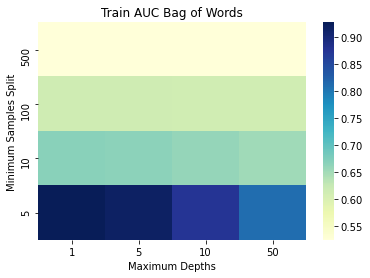

In [24]:
hm = sns.heatmap(get_broken_arrays(train_auc_bow), vmin=np.amin(train_auc_bow), vmax=np.amax(train_auc_bow), xticklabels=depths, yticklabels=splits[::-1], cmap="YlGnBu")
plt.title("Train AUC Bag of Words")
plt.xlabel("Maximum Depths")
plt.ylabel("Minimum Samples Split")
plt.show()

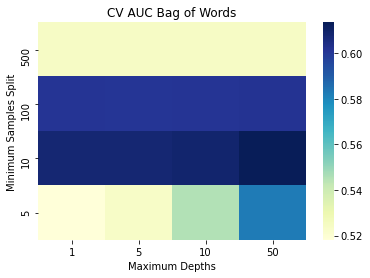

In [25]:
hm = sns.heatmap(get_broken_arrays(cv_auc_bow), vmin=np.amin(cv_auc_bow), vmax=np.amax(cv_auc_bow), xticklabels=depths, yticklabels=splits[::-1], cmap="YlGnBu")
plt.title("CV AUC Bag of Words")
plt.xlabel("Maximum Depths")
plt.ylabel("Minimum Samples Split")
plt.show()

## Applying the Decision Tree Classifier with the best parameters

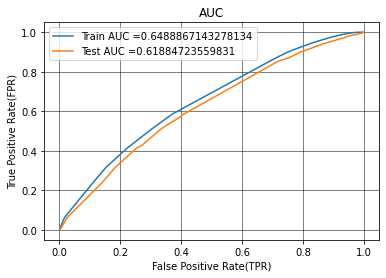

In [26]:
dt_bow = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)
dt_bow.fit(X_tr_bow, y_train)

y_train_pred_bow = dt_bow.predict_proba(X_tr_bow)
y_test_pred_bow = dt_bow.predict_proba(X_te_bow)

train_fpr_bow, train_tpr_bow, tr_thresholds_bow = roc_curve(y_train, y_train_pred_bow[:,1])
test_fpr_bow, test_tpr_bow, te_thresholds_bow = roc_curve(y_test, y_test_pred_bow[:,1])

plt.plot(train_fpr_bow, train_tpr_bow, label="Train AUC ="+str(auc(train_fpr_bow, train_tpr_bow)))
plt.plot(test_fpr_bow, test_tpr_bow, label="Test AUC ="+str(auc(test_fpr_bow, test_tpr_bow)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()



## Displaying the Confusion Matrix

In [27]:
y_preds_bow = dt_bow.predict(X_te_bow)
conf_mat_bow = confusion_matrix(y_test, y_preds_bow)

<AxesSubplot:>

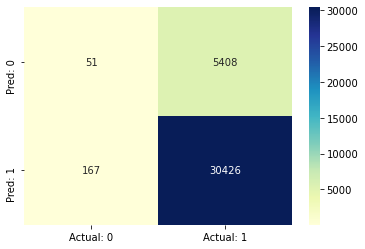

In [28]:
df_cm = pd.DataFrame(conf_mat_bow, index = ["Pred: 0", "Pred: 1"], columns = ["Actual: 0", "Actual: 1"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, fmt='g', cmap="YlGnBu")

In [29]:
fp_indices = []
for i in range(len(y_preds_bow)):
    if(y_test[i] == 0 and y_preds_bow[i] == 1):
        fp_indices.append(i)

## Showing the wordcloud of the words in False Positives

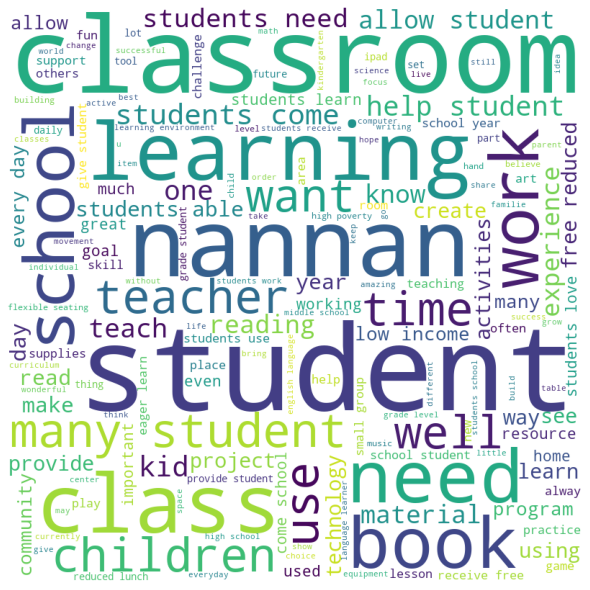

In [30]:
word_list = ""
stopwords = set(STOPWORDS)
for i in fp_indices:
    essay = data.iloc[i]['essay']
    tokens = essay.split()
    for j in range(len(tokens)):
        tokens[j] = tokens[j].lower()
    word_list += " ".join(tokens)+ " " 

wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', 
                        stopwords = stopwords, min_font_size = 10).generate(word_list)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

## Boxplot of Prices of False Positives

[Text(0.5, 1.0, 'Box Plot of False Positives, Bag of Words')]

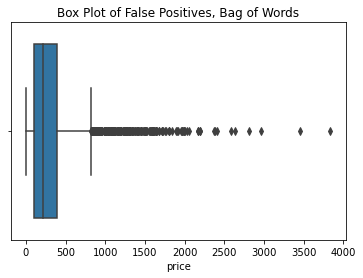

In [31]:
ax = sns.boxplot(data.iloc[fp_indices]['price'])
ax.set(title="Box Plot of False Positives, Bag of Words")

## PDF of Previous Posts of False Positives

[Text(0.5, 1.0, 'PDF of Number of Previously Posted Projects, Bag of Words')]

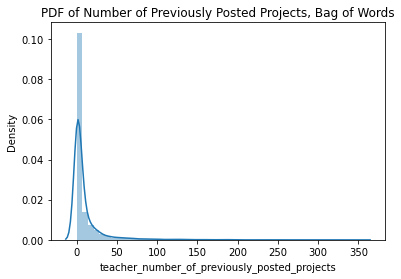

In [32]:
ax = sns.distplot(data.iloc[fp_indices]['teacher_number_of_previously_posted_projects'])
ax.set(title="PDF of Number of Previously Posted Projects, Bag of Words")

# TFIDF

## Cross Validation to get the best parameters

In [ ]:
dt_tfidf = DecisionTreeClassifier()

parameters = {'max_depth':[1,5,10,50], 'min_samples_split':[5,10,100,500]}

clf_tfidf = GridSearchCV(dt_tfidf, parameters, cv= 5, scoring='roc_auc',return_train_score=True,verbose=2)

clf_tfidf.fit(X_tr_tfidf, y_train)

train_auc_tfidf = clf_tfidf.cv_results_['mean_train_score']
train_auc_std_tfidf = clf_tfidf.cv_results_['std_train_score']
cv_auc_tfidf = clf_tfidf.cv_results_['mean_test_score'] 
cv_auc_std_tfidf = clf_tfidf.cv_results_['std_test_score']

In [34]:
clf_tfidf.best_params_

{'max_depth': 10, 'min_samples_split': 500}

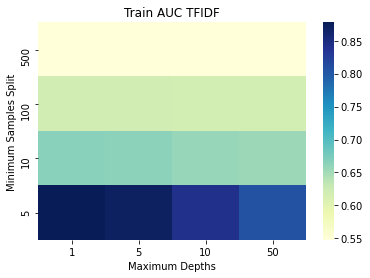

In [35]:
hm = sns.heatmap(get_broken_arrays(train_auc_tfidf), vmin=np.amin(train_auc_tfidf), vmax=np.amax(train_auc_tfidf), xticklabels=depths, yticklabels=splits[::-1], cmap="YlGnBu")
plt.title("Train AUC TFIDF")
plt.xlabel("Maximum Depths")
plt.ylabel("Minimum Samples Split")
plt.show()

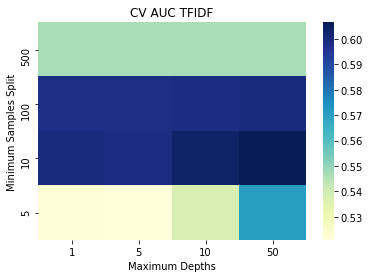

In [36]:
hm = sns.heatmap(get_broken_arrays(cv_auc_tfidf), vmin=np.amin(cv_auc_tfidf), vmax=np.amax(cv_auc_tfidf), xticklabels=depths, yticklabels=splits[::-1], cmap="YlGnBu")
plt.title("CV AUC TFIDF")
plt.xlabel("Maximum Depths")
plt.ylabel("Minimum Samples Split")
plt.show()


## Applying Decision Tree Classifier with the best parameters

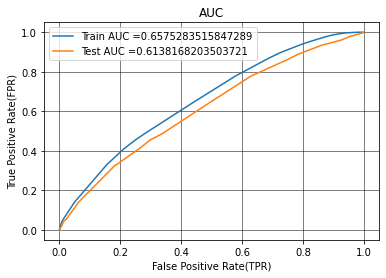

In [37]:
dt_tfidf = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)
dt_tfidf.fit(X_tr_tfidf, y_train)

y_train_pred_tfidf = dt_tfidf.predict_proba(X_tr_tfidf)
y_test_pred_tfidf = dt_tfidf.predict_proba(X_te_tfidf)

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred_tfidf[:,1])
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred_tfidf[:,1])

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="Train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="Test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()



## Displaying the Confusion Matrix

In [38]:
y_preds_tfidf = dt_tfidf.predict(X_te_tfidf)
conf_mat_tfidf = confusion_matrix(y_test, y_preds_tfidf)

<AxesSubplot:>

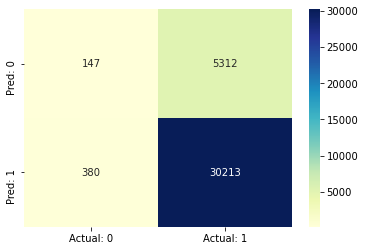

In [39]:
df_cm = pd.DataFrame(conf_mat_tfidf, index = ["Pred: 0", "Pred: 1"], columns = ["Actual: 0", "Actual: 1"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, fmt='g', cmap="YlGnBu")

## Displaying the wordcloud of essays of False Positives

In [40]:
fp_indices = []
for i in range(len(y_preds_tfidf)):
    if(y_test[i] == 0 and y_preds_tfidf[i] == 1):
        fp_indices.append(i)

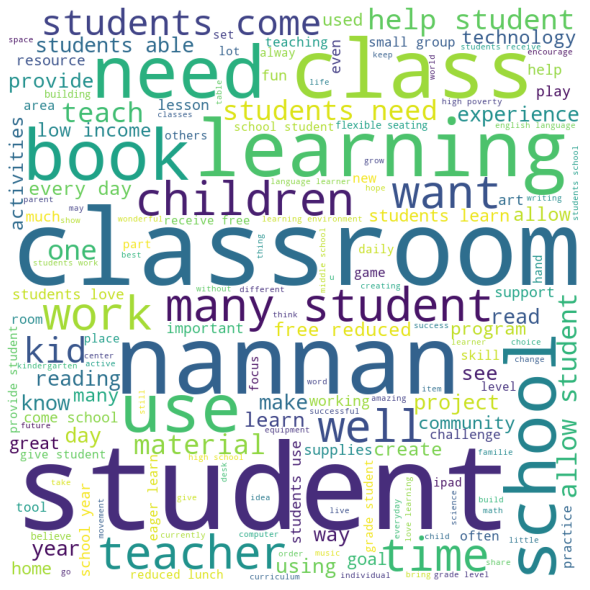

In [41]:
word_list = ""
stopwords = set(STOPWORDS)
for i in fp_indices:
    essay = data.iloc[i]['essay']
    tokens = essay.split()
    for j in range(len(tokens)):
        tokens[j] = tokens[j].lower()
    word_list += " ".join(tokens)+ " " 

wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', 
                        stopwords = stopwords, min_font_size = 10).generate(word_list)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

## Box Plot of Prices of False Positives

[Text(0.5, 1.0, 'Box Plot of False Positives, TFIDF')]

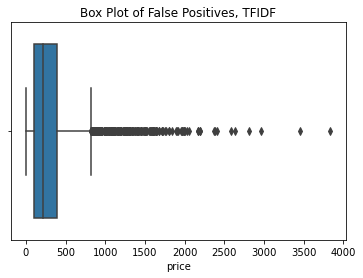

In [42]:
ax = sns.boxplot(data.iloc[fp_indices]['price'])
ax.set(title="Box Plot of False Positives, TFIDF")

## PDF of Previous Posts of False Postives

[Text(0.5, 1.0, 'PDF of Number of Previously Posted Projects, TFIDF')]

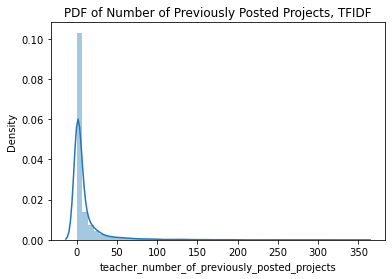

In [43]:
ax = sns.distplot(data.iloc[fp_indices]['teacher_number_of_previously_posted_projects'])
ax.set(title="PDF of Number of Previously Posted Projects, TFIDF")

# TFIDF W2v

## Cross Validation to get the best parameters

In [ ]:
dt_tfidf_w2v = DecisionTreeClassifier()

parameters = {'max_depth':[1,5,10,50], 'min_samples_split':[5,10,100,500]}

clf_tfidf_w2v = GridSearchCV(dt_tfidf_w2v, parameters, cv= 5, scoring='roc_auc',return_train_score=True,verbose=2)

clf_tfidf_w2v.fit(X_tr_tfidf_w2v, y_train)

train_auc_tfidf_w2v = clf_tfidf_w2v.cv_results_['mean_train_score']
train_auc_std_tfidf_w2v = clf_tfidf_w2v.cv_results_['std_train_score']
cv_auc_tfidf_w2v = clf_tfidf_w2v.cv_results_['mean_test_score'] 
cv_auc_std_tfidf_w2v = clf_tfidf_w2v.cv_results_['std_test_score']

In [45]:
clf_tfidf_w2v.best_params_

{'max_depth': 5, 'min_samples_split': 500}

In [46]:
clf_tfidf_w2v.best_params_

{'max_depth': 5, 'min_samples_split': 500}

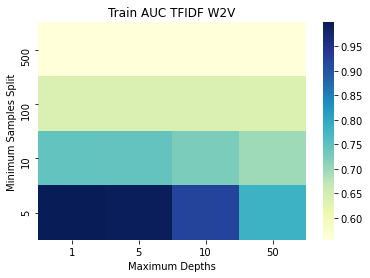

In [47]:
hm = sns.heatmap(get_broken_arrays(train_auc_tfidf_w2v), vmin=np.amin(train_auc_tfidf_w2v), vmax=np.amax(train_auc_tfidf_w2v), xticklabels=depths, yticklabels=splits[::-1], cmap="YlGnBu")
plt.title("Train AUC TFIDF W2V")
plt.xlabel("Maximum Depths")
plt.ylabel("Minimum Samples Split")
plt.show()

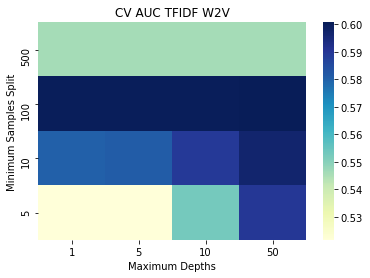

In [48]:
hm = sns.heatmap(get_broken_arrays(cv_auc_tfidf_w2v), vmin=np.amin(cv_auc_tfidf_w2v), vmax=np.amax(cv_auc_tfidf_w2v), xticklabels=depths, yticklabels=splits[::-1], cmap="YlGnBu")
plt.title("CV AUC TFIDF W2V")
plt.xlabel("Maximum Depths")
plt.ylabel("Minimum Samples Split")
plt.show()

## Applying Decision Tree Classifier with the best parameters

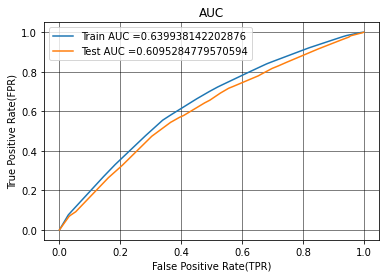

In [49]:
dt_tfidf_w2v = DecisionTreeClassifier(max_depth = 5, min_samples_split = 100)
dt_tfidf_w2v.fit(X_tr_tfidf_w2v, y_train)

y_train_pred_tfidf_w2v = dt_tfidf_w2v.predict_proba(X_tr_tfidf_w2v)
y_test_pred_tfidf_w2v = dt_tfidf_w2v.predict_proba(X_te_tfidf_w2v)

train_fpr_tfidf_w2v, train_tpr_tfidf_w2v, tr_thresholds_tfidf_w2v = roc_curve(y_train, y_train_pred_tfidf_w2v[:,1])
test_fpr_tfidf_w2v, test_tpr_tfidf_w2v, te_thresholds_tfidf_w2v = roc_curve(y_test, y_test_pred_tfidf_w2v[:,1])

plt.plot(train_fpr_tfidf_w2v, train_tpr_tfidf_w2v, label="Train AUC ="+str(auc(train_fpr_tfidf_w2v, train_tpr_tfidf_w2v)))
plt.plot(test_fpr_tfidf_w2v, test_tpr_tfidf_w2v, label="Test AUC ="+str(auc(test_fpr_tfidf_w2v, test_tpr_tfidf_w2v)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## Displaying the Confusion Matrix

In [50]:
y_preds_tfidf_w2v = dt_tfidf_w2v.predict(X_te_tfidf_w2v)
conf_mat_tfidf_w2v = confusion_matrix(y_test, y_preds_tfidf_w2v)

<AxesSubplot:>

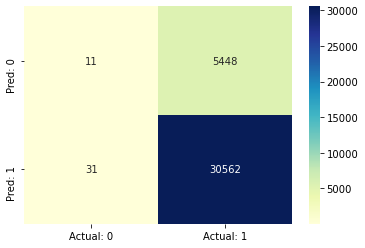

In [51]:
df_cm = pd.DataFrame(conf_mat_tfidf_w2v, index = ["Pred: 0", "Pred: 1"], columns = ["Actual: 0", "Actual: 1"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, fmt='g', cmap="YlGnBu")

## Displaying the wordcloud of essays in False Positives

In [52]:
fp_indices = []
for i in range(len(y_preds_tfidf_w2v)):
    if(y_test[i] == 0 and y_preds_tfidf_w2v[i] == 1):
        fp_indices.append(i)

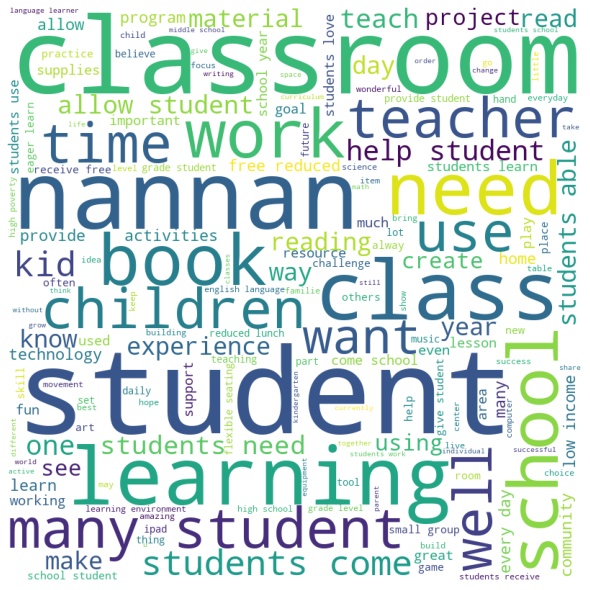

In [53]:
word_list = ""
stopwords = set(STOPWORDS)
for i in fp_indices:
    essay = data.iloc[i]['essay']
    tokens = essay.split()
    for j in range(len(tokens)):
        tokens[j] = tokens[j].lower()
    word_list += " ".join(tokens)+ " " 

wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', 
                        stopwords = stopwords, min_font_size = 10).generate(word_list)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

## Displaying the BoxPlot of prices of False Positives

[Text(0.5, 1.0, 'Box Plot of False Positives, TFIDF W2V')]

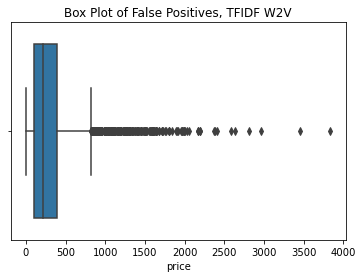

In [54]:
ax = sns.boxplot(data.iloc[fp_indices]['price'])
ax.set(title="Box Plot of False Positives, TFIDF W2V")

## PDF of Previous Posts of False Positives

[Text(0.5, 1.0, 'PDF of Number of Previously Posted Projects, TFIDF W2v')]

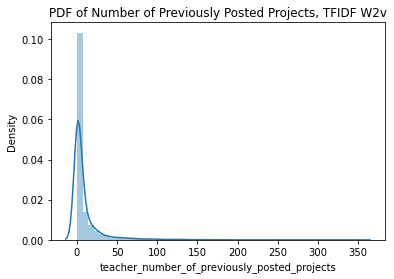

In [55]:
ax = sns.distplot(data.iloc[fp_indices]['teacher_number_of_previously_posted_projects'])
ax.set(title="PDF of Number of Previously Posted Projects, TFIDF W2v")

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

## Training Model on BOW Data without Max Depth

In [71]:
if_dt = DecisionTreeClassifier(min_samples_split = 500)
if_dt.fit(X_tr_bow, y_train)


DecisionTreeClassifier(min_samples_split=500)

## Getting the important features

In [72]:
imp_features = np.argwhere(if_dt.feature_importances_ != 0)
imp_features

array([[   0],
       [   6],
       [  16],
       ...,
       [5102],
       [5103],
       [5104]])

In [73]:
imp_features = [imp_features[i][0] for i in range(imp_features.shape[0])]

In [74]:
imp_features_train  = X_tr_bow[:, imp_features]
imp_features_cv = X_cr_bow[:, imp_features]
imp_features_test = X_te_bow[:, imp_features]

## Training on only the important features

In [ ]:
if_bow = DecisionTreeClassifier()

parameters = {'max_depth':[1,5,10,50], 'min_samples_split':[5,10,100,500]}

if_clf_bow = GridSearchCV(if_bow, parameters, cv= 5, scoring='roc_auc',return_train_score=True,verbose=2)

if_clf_bow.fit(imp_features_train, y_train)

if_train_auc_bow = if_clf_bow.cv_results_['mean_train_score']
if_train_auc_std_bow = if_clf_bow.cv_results_['std_train_score']
if_cv_auc_bow = if_clf_bow.cv_results_['mean_test_score'] 
if_cv_auc_std_bow = if_clf_bow.cv_results_['std_test_score']

In [76]:
if_clf_bow.best_params_

{'max_depth': 10, 'min_samples_split': 500}

## Plotting the Heatmaps

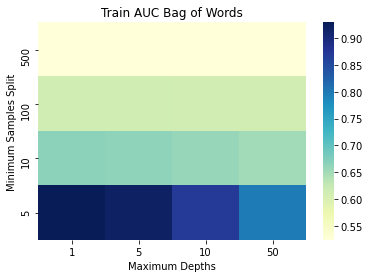

In [77]:
hm = sns.heatmap(get_broken_arrays(if_train_auc_bow), vmin=np.amin(if_train_auc_bow), vmax=np.amax(if_train_auc_bow), xticklabels=depths, yticklabels=splits[::-1], cmap="YlGnBu")
plt.title("Train AUC Bag of Words")
plt.xlabel("Maximum Depths")
plt.ylabel("Minimum Samples Split")
plt.show()

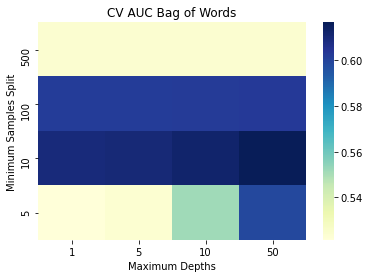

In [78]:
hm = sns.heatmap(get_broken_arrays(if_cv_auc_bow), vmin=np.amin(if_cv_auc_bow), vmax=np.amax(if_cv_auc_bow), xticklabels=depths, yticklabels=splits[::-1], cmap="YlGnBu")
plt.title("CV AUC Bag of Words")
plt.xlabel("Maximum Depths")
plt.ylabel("Minimum Samples Split")
plt.show()

## Training on the best parameters and plotting AUC Curve

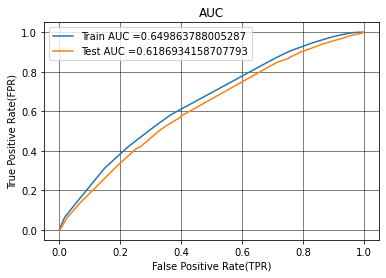

In [79]:
if_dt_bow = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)
if_dt_bow.fit(imp_features_train, y_train)

if_y_train_pred_bow = if_dt_bow.predict_proba(imp_features_train)
if_y_test_pred_bow = if_dt_bow.predict_proba(imp_features_test)

if_train_fpr_bow, if_train_tpr_bow, if_tr_thresholds_bow = roc_curve(y_train, if_y_train_pred_bow[:,1])
if_test_fpr_bow, if_test_tpr_bow, if_te_thresholds_bow = roc_curve(y_test, if_y_test_pred_bow[:,1])

plt.plot(if_train_fpr_bow, if_train_tpr_bow, label="Train AUC ="+str(auc(if_train_fpr_bow, if_train_tpr_bow)))
plt.plot(if_test_fpr_bow, if_test_tpr_bow, label="Test AUC ="+str(auc(if_test_fpr_bow, if_test_tpr_bow)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()



In [80]:
if_y_preds_bow = if_dt_bow.predict(imp_features_test)
if_conf_mat_bow = confusion_matrix(y_test, if_y_preds_bow)

## Displaying the Confusion Matrix

<AxesSubplot:>

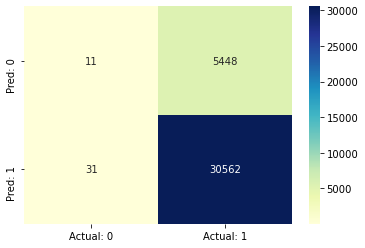

In [81]:
if_df_cm = pd.DataFrame(if_conf_mat_bow, index = ["Pred: 0", "Pred: 1"], columns = ["Actual: 0", "Actual: 1"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, fmt='g', cmap="YlGnBu")

In [82]:
fp_indices = []
for i in range(len(if_y_preds_bow)):
    if(y_test[i] == 0 and if_y_preds_bow[i] == 1):
        fp_indices.append(i)

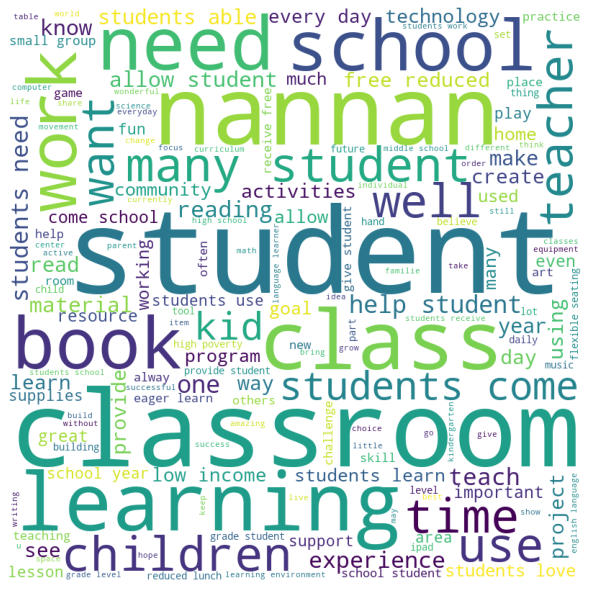

In [83]:
word_list = ""
stopwords = set(STOPWORDS)
for i in fp_indices:
    essay = data.iloc[i]['essay']
    tokens = essay.split()
    for j in range(len(tokens)):
        tokens[j] = tokens[j].lower()
    word_list += " ".join(tokens)+ " " 

wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', 
                        stopwords = stopwords, min_font_size = 10).generate(word_list)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# Displaying the final results

In [85]:
df = pd.DataFrame([["Bag of Words", "Decision Tree", 10, 500, 0.65359, 0.62339], ["TFIDf", "Decision Tree", 10, 500, 0.65747, 0.62319], ["TFIDF W2V", "Decision Tree", 5, 100, 0.63984, 0.60992], ["Bag of Words with Important Features", "Decision Tree", 10, 500, 0.65359, 0.62339]], columns = ["Vectorizer", "Model", "Max Depth", "Minimum Splits", "Train AUC", "Test AUC"])
df

Vectorizer          Model  Max Depth  \
0                          Bag of Words  Decision Tree         10   
1                                 TFIDf  Decision Tree         10   
2                             TFIDF W2V  Decision Tree          5   
3  Bag of Words with Important Features  Decision Tree         10   

   Minimum Splits  Train AUC  Test AUC  
0             500    0.65359   0.62339  
1             500    0.65747   0.62319  
2             100    0.63984   0.60992  
3             500    0.65359   0.62339